# Binary Tree Matching

In [77]:
class TreeComponent:
    pass

class EmptyTree(TreeComponent):
    pass

class Epsilon(TreeComponent):
    pass

class Node(TreeComponent):
      def __init__(self, label, lhs=EmptyTree(), rhs=EmptyTree()):
        self.label = label
        self.lhs = lhs
        self.rhs = rhs


class Parser:
    def matches(self, tree, pattern):
        if isinstance(tree, EmptyTree) and isinstance(pattern, EmptyTree):
            return True
        elif isinstance(tree, EmptyTree) ^ isinstance(pattern, EmptyTree):
            return False
            
        
        if isinstance(tree, Epsilon) or isinstance(pattern, Epsilon):
            return True
        
        if tree.label == pattern.label and \
                    self.matches(tree.lhs, pattern.lhs) and \
                    self.matches(tree.rhs, pattern.rhs):
            return True
        else:
            return self.matches(tree.lhs, pattern) or self.matches(tree.rhs, pattern)
            

In [82]:
tree = Node("+",
            Node("/",
                 Node(6), 
                 Node(6)
                ),
           Node(10))
parser = Parser()

pattern = Node("+", Node("-", Epsilon(), Epsilon()), Epsilon())
assert(parser.matches(tree, pattern) == False)

pattern = Node("+", Node("/", Epsilon(), Epsilon()), Epsilon())
assert(parser.matches(tree, pattern) == True)

pattern = Node("/", Node(6), Node(6))
assert(parser.matches(tree, pattern) == True)

pattern = Node(6)
assert(parser.matches(tree, pattern) == True)

# Arbitrary Tree Matching

In [812]:
class TreeComponent:
    pass

class EmptyTree(TreeComponent):
    pass
class Epsilon(TreeComponent):
    pass

class Node(TreeComponent):
    def __init__(self, id=None, label="", *nodes):
        self.label = label
        self.id = id
        if nodes == None:
            self.nodes = [EmptyTree()]
            return
        self.nodes = [node for node in nodes]
        
    def add_node(self, node):
        if self.nodes == EmptyTree():
            self.nodes = []
        self.nodes.append(node)


class Parser:
    def __init__(self, pattern):
        self.match = []
        self.pattern = pattern
    
    def matches(self, tree, pattern=None):
        if pattern == None:
            pattern = self.pattern
        if len(pattern.nodes) > len(tree.nodes):
            return False

        if (pattern.label == "*" or tree.label == pattern.label) and \
                    all([self.matches(tree.nodes[x], pattern.nodes[x]) for x in range(len(pattern.nodes))]):
            self.match = tree
            return True
        elif pattern.label == "*":
            if len(tree.nodes) > len(pattern.nodes):
                return False
            return all([self.matches(tree.nodes[x], self.pattern.nodes[x]) for x in range(len(tree.nodes))])
        else:
            return any([self.matches(tree.nodes[x], self.pattern) for x in range(len(tree.nodes))])
            
            
            
        return True

In [813]:
tree = Node(0, "+",
            Node(1, "/",
                 Node(2, 6), 
                 Node(3, 6)
                ),
           Node(4, 10))

pattern = Node(0, "+", Node(1, 6))
parser = Parser(pattern)

assert(parser.matches(tree) == False)

pattern = Node(0, "/", Node(1, 6))
parser = Parser(pattern)

assert(parser.matches(tree) == True)


In [924]:
import networkx as nx

def networkxToGraph(G, attr="label"):
    tree = Node(None, "root", *[Node(x, G.nodes[x][attr]) for x in range(len(G))])
    print(G.edges)
    print([node.id for node in tree.nodes])
    for e in G.edges:
        tree.nodes[e[0]].add_node(tree.nodes[e[1]]) 
            
    return tree


def GraphToNetworkx(tree):
    G = nx.DiGraph()
    G.add_nodes_from([x.id for x in tree.nodes])
    for x in tree.nodes:
        if not tree.label == "root":
            G.add_edge(tree.id, x.id)
        for y in x.nodes:
            G.add_edge(x.id, y.id)
            G.add_node(x.id, label=x.label)
            G.add_node(y.id, label=y.label)
        
    return G



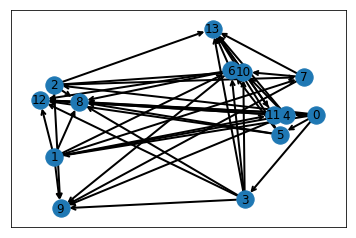

In [935]:
G=nx.gnp_random_graph(14,0.5,directed=True)

G = nx.DiGraph([(u,v,{'weight':random.randint(-10,10)}) for (u,v) in G.edges() if u<v])

def drawgraph(G):
    pos = nx.layout.spring_layout(G)

    for node in G:
        G.add_node(node, label=node)

    nodes = nx.draw_networkx_nodes(G, pos)
    edges = nx.draw_networkx_edges(
        G,
        pos,
        arrowstyle="->",
        arrowsize=10,
        width=2,
    )
    nx.draw_networkx_labels(G,pos)
    plt.show()
drawgraph(G)

[(0, 1), (0, 2), (0, 3), (0, 4), (0, 5), (0, 8), (0, 12), (1, 4), (1, 6), (1, 7), (1, 8), (1, 9), (1, 11), (1, 12), (2, 7), (2, 8), (2, 9), (2, 10), (2, 13), (3, 6), (3, 8), (3, 9), (3, 10), (3, 12), (3, 13), (4, 9), (4, 10), (4, 11), (4, 12), (4, 13), (5, 6), (5, 8), (5, 12), (5, 13), (8, 12), (6, 8), (6, 9), (6, 12), (6, 13), (7, 9), (7, 10), (7, 13), (11, 12), (11, 13), (10, 11), (10, 13)]
[0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13]


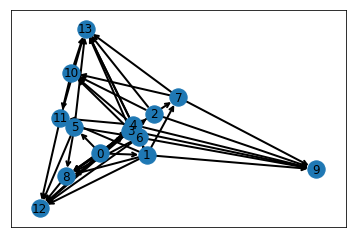

In [936]:
tree = networkxToGraph(G, "label")
drawgraph(GraphToNetworkx(tree))



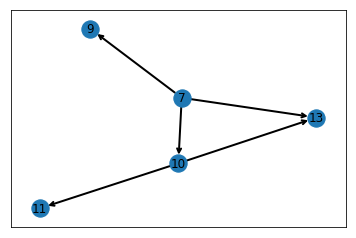

In [939]:

pattern = Node(0, 7, 
               Node(0, 9))
parser = Parser(pattern)
if parser.matches(tree):
    colors = []
    G_filtered = GraphToNetworkx(parser.match)
    drawgraph(G_filtered)
else:
    print("nothing found")
    
